# Advanced Functional EDA (Gelişmiş Fonksiyonel Veri Analizi)
---
- Verileri ölçeklenebilir fonksiyonel biçimde işleyebilmeyi amaçlar.
- Amacımız hızlı bir şekilde genel fonksiyonlar yardımı ile veriyi analiz etmek.
---
- Analysis of Categorical Variables (Kategorik Değişken Analizi)
- Analysis of Numerical Variables (Sayısal Değişken Analizi)
- Analysis of Target Variable (Hedef Değişken Analizi)
- Analysis of Correlation (Korelasyon Analizi)
---
## Genel Resim

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.shape # satır ve sütun bilgisi

(891, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


- veri seti içerisinde eksik değer var mı?

In [7]:
df.isnull().values.any()

True

- hangi değişkenlerde kaç adet eksik değer var?

In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- buraya kadar veriye bir genel bakış attık. şimdi bu işlemleri fonksiyonel olarak gerçekleştirelim.

In [9]:
def check_df(dataframe, head=5):
    print("##################### SHAPE #####################")
    print(dataframe.shape)
    print("##################### TYPES #####################")
    print(dataframe.dtypes)
    print("##################### HEAD #####################")
    print(dataframe.head(head))
    print("##################### TAIL #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### QUANTILES #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [10]:
check_df(df)

##################### SHAPE #####################
(891, 15)
##################### TYPES #####################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
##################### HEAD #####################
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  

### Analysis of Categorical Variables (Kategorik Değişken Analizi)

In [11]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [12]:
df["sex"].unique() # cinsiyet değişkeninde eşsiz değerlere ulaştık.

array(['male', 'female'], dtype=object)

In [13]:
df["class"].nunique() # class değişkeninde kaç adet eşsiz değer olduğunun bilgisi.

3

- Genel olarak kategorik değişkenler üzerinde analiz yaptık fakat çok sayıda değişkenimiz olduğunda bu adımları tüm değişkenlere nasıl uygulayacağız?
- Veri setimizin içerisinde otomatik olarak olası tüm kategorik değişkenleri yakalayan bir çalışma yapmamız gerekiyor.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- Tip bilgisinden kategorik değişkenleri yakalayabiliriz.
    - **bool, category, object** 
- Fakat **int** veri tipinde olup kategorik değişkenlerde olabiliyor. O yüzden sadece bu iç veri tipinden kategorik olanları yakalayamıyoruz.
- Hem tip bilgisine göre seçim yapcağız hem de tip bilgisi farklı olmasına rağmen sayısal ama kategorik olan değişkenleri yakalamamız gerekiyor.

In [15]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

In [16]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

- **survived** ve **pclass** değişkenleri incelendiğinde kategorik bir değişken fakat **int** veri tipinde olduklarından dolayı bu değişkenleri yakalayamadık.

In [17]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

In [18]:
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

- ölçeklenemeyecek kadar sınıfı olanları ayırt etmeliyiz. örneğin; isim ve soyisim.
- programatik olarak, veri setinde bulunan ve kategorik olmasına rağmen kategorik olmayan değişkenleri yakalamamız gerekiyor.

In [19]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["int", "float"]]

In [20]:
cat_but_car

[]

In [21]:
cat_cols = cat_cols + num_but_cat

In [22]:
df[cat_cols].head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,pclass,sibsp,parch
0,male,S,Third,man,True,NaN,Southampton,no,False,0,3,1,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1,1,1,0
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1,3,0,0
3,female,S,First,woman,False,C,Southampton,yes,False,1,1,1,0
4,male,S,Third,man,True,NaN,Southampton,no,True,0,3,0,0


In [23]:
df[cat_cols].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

- peki sayısal değerlerimize ulaşmak istersek?

In [24]:
[col for col in df.columns if col not in cat_cols]

['age', 'fare']

- **survived** değişkeninde hangi sınıftan kaç tane var?

In [25]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [26]:
100 * df["survived"].value_counts() / len(df) # sınıfları yüzdesel olarak görüyoruz.

0    61.616162
1    38.383838
Name: survived, dtype: float64

- bir fonksiyon oluşturalım. bu fonksiyon, değerleri **value_counts()**'dan alsın.

In [27]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

In [28]:
cat_summary(df, "sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


In [29]:
for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
##########################################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#####################

- şimdi yazdığımız fonksiyona grafik bilgisi ekleyelim.

In [30]:
def cat_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


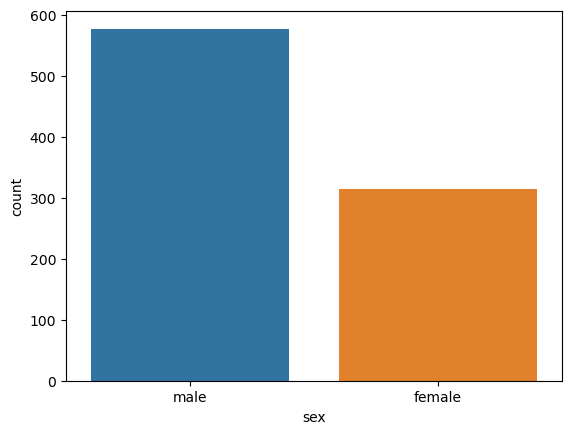

In [31]:
cat_summary(df, "sex", plot=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


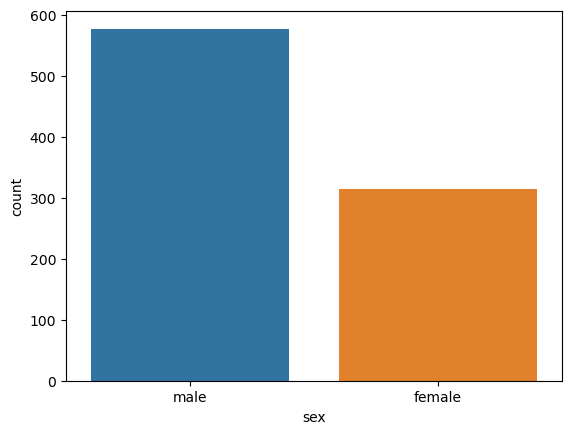

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################


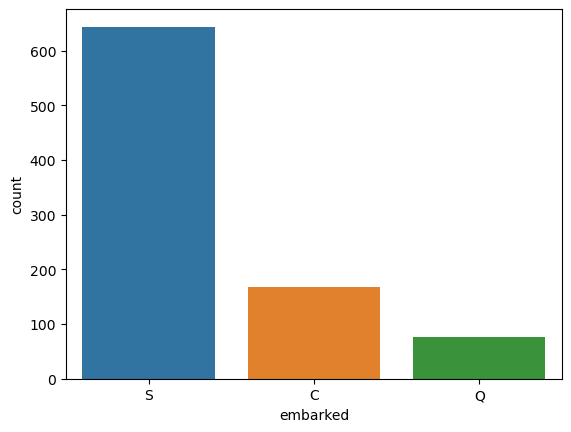

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


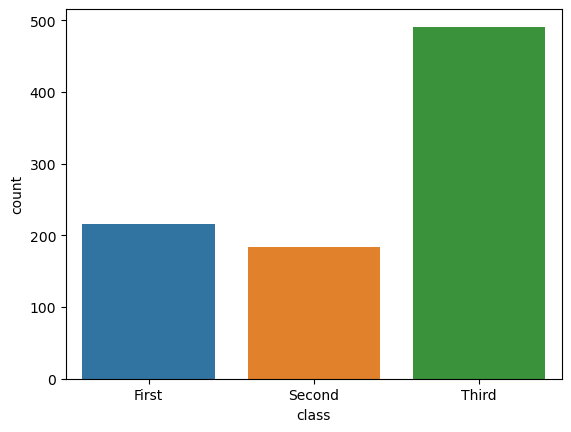

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


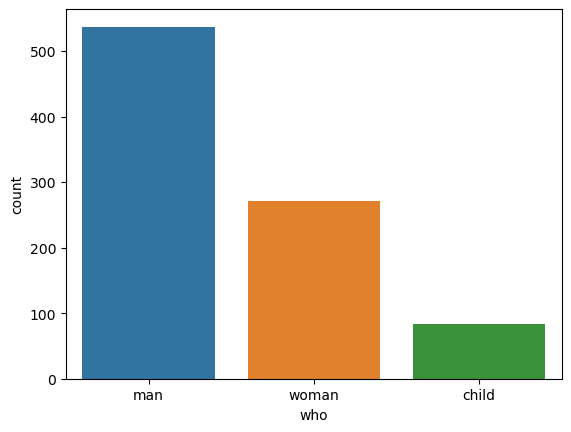

sdfsdfsdfsdfsdf
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################


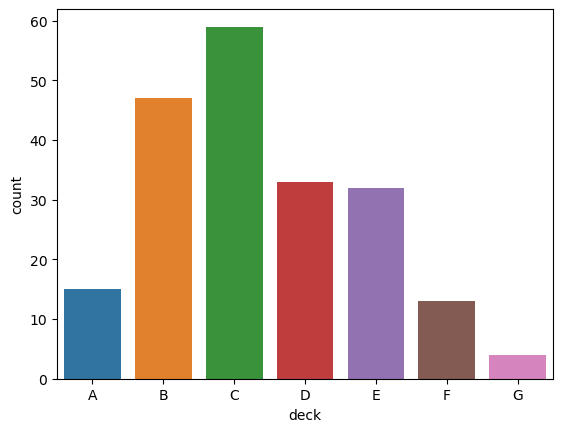

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


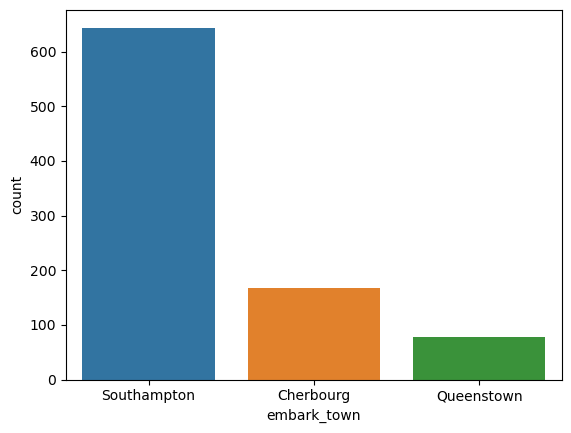

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##########################################


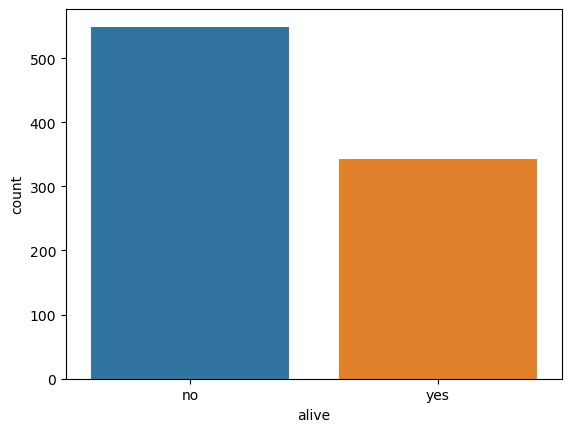

sdfsdfsdfsdfsdf
   survived      Ratio
0       549  61.616162
1       342  38.383838
##########################################


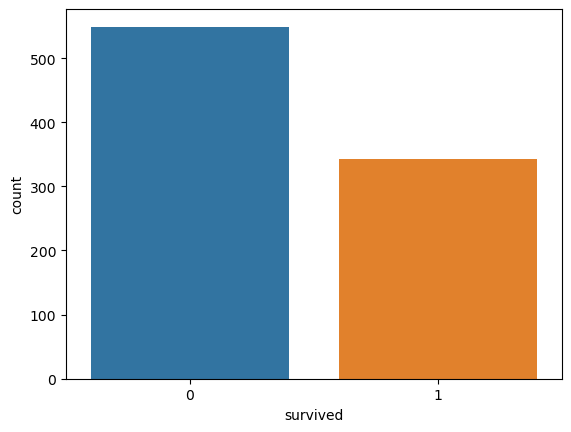

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##########################################


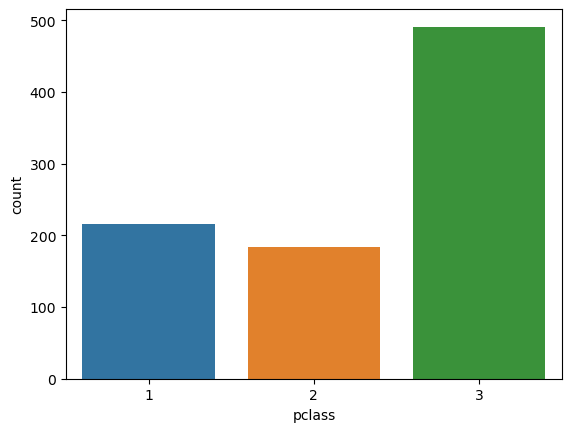

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##########################################


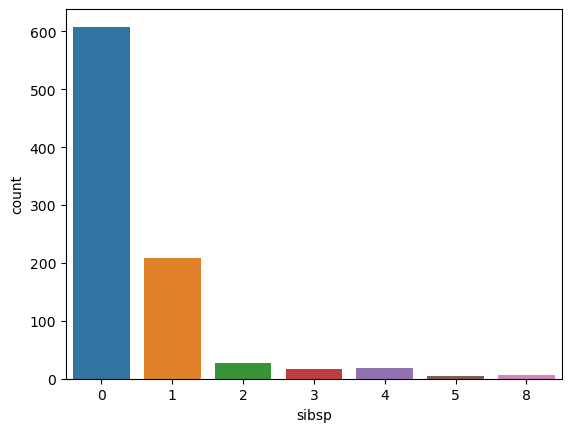

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##########################################


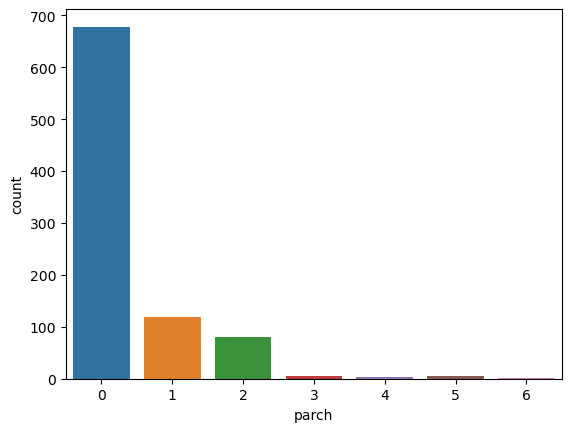

In [32]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        print("sdfsdfsdfsdfsdf")
    else:
        cat_summary(df, col, plot = True)

- bool veri tipindeki değişkenleri çevirmemiz gerekiyor.
- True değerleri 1, False değerleri 0 yaparsak grafik yazdırabiliriz.

In [33]:
df["adult_male"].astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int64

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


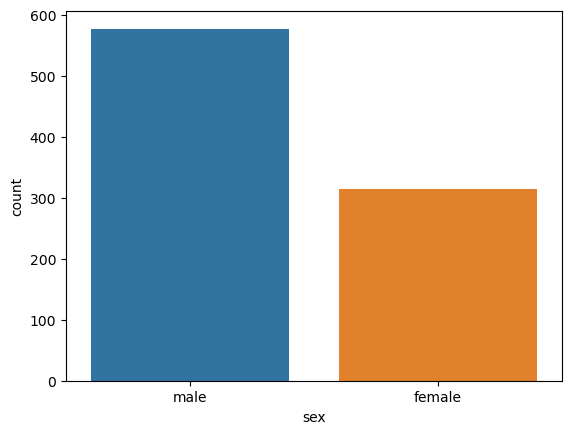

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################


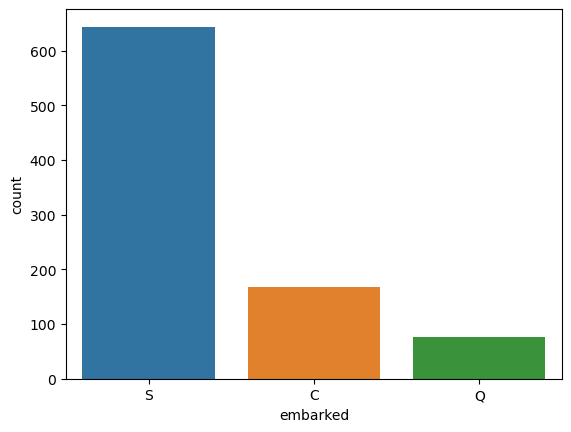

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


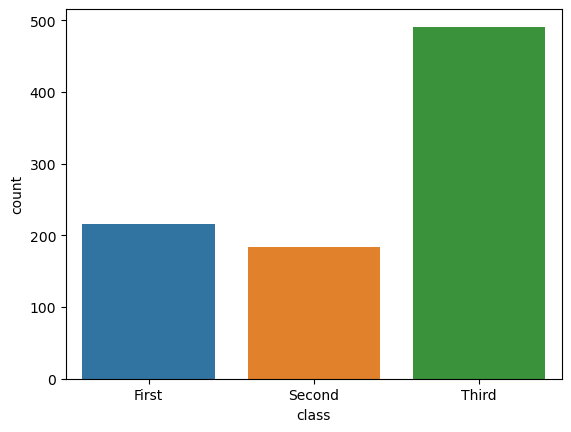

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


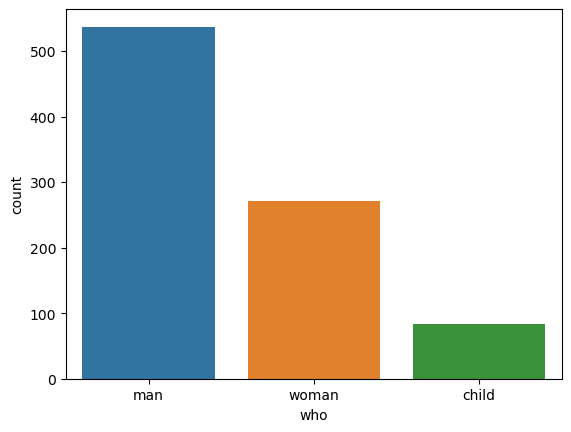

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
##########################################


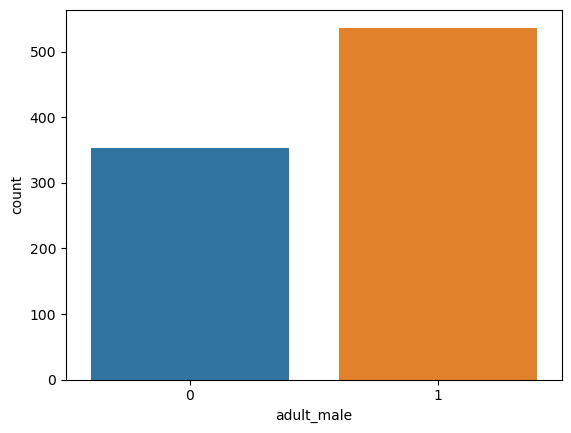

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################


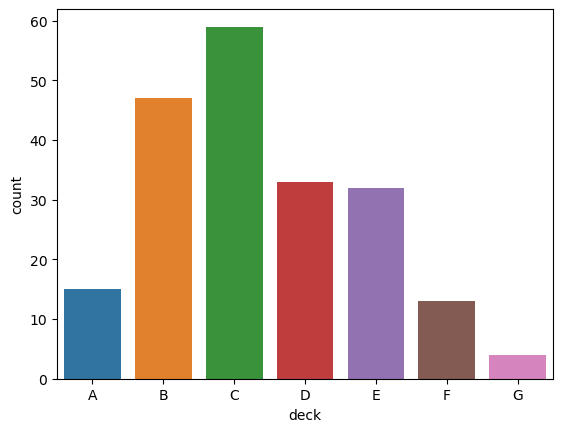

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


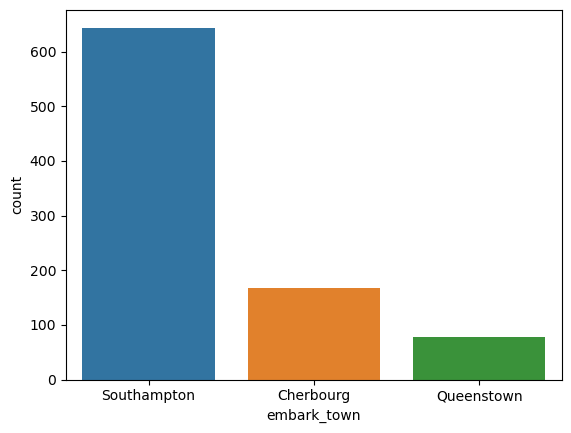

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##########################################


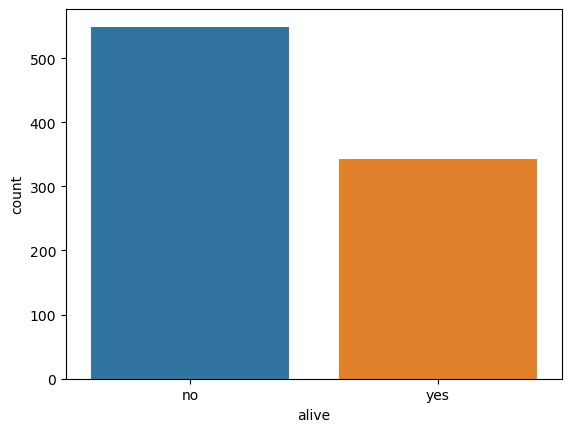

   alone     Ratio
1    537  60.26936
0    354  39.73064
##########################################


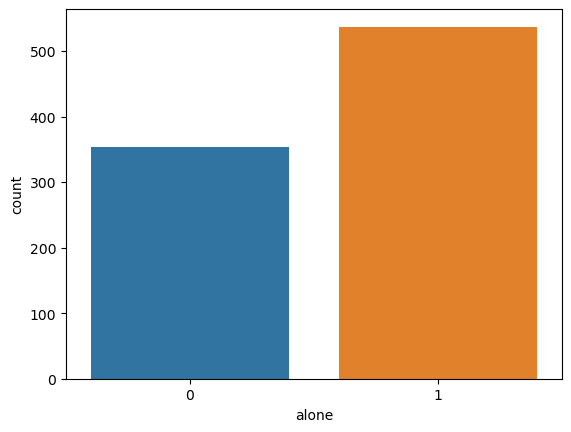

   survived      Ratio
0       549  61.616162
1       342  38.383838
##########################################


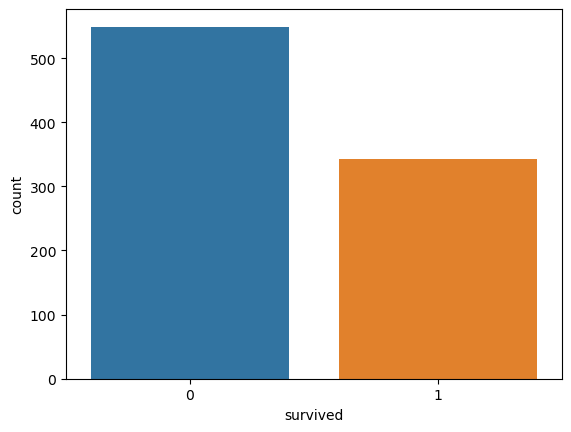

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##########################################


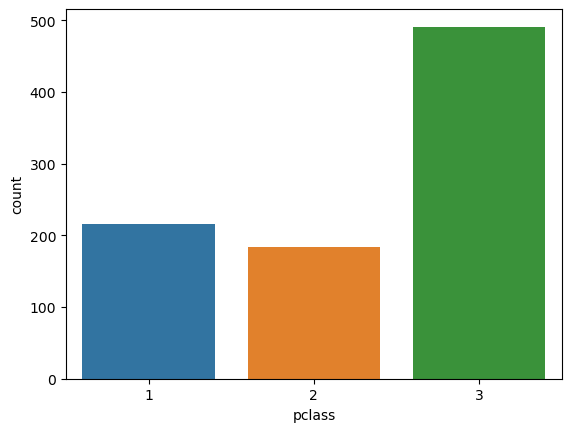

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##########################################


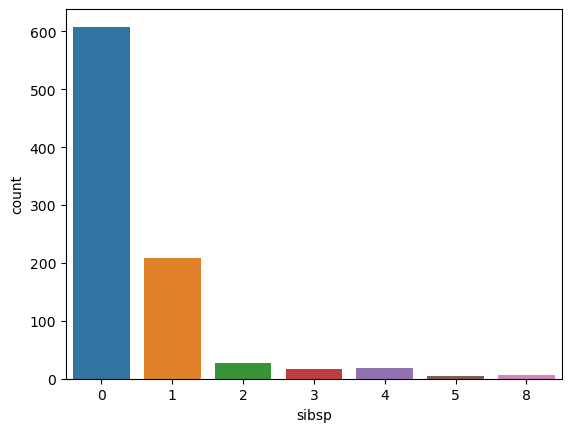

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##########################################


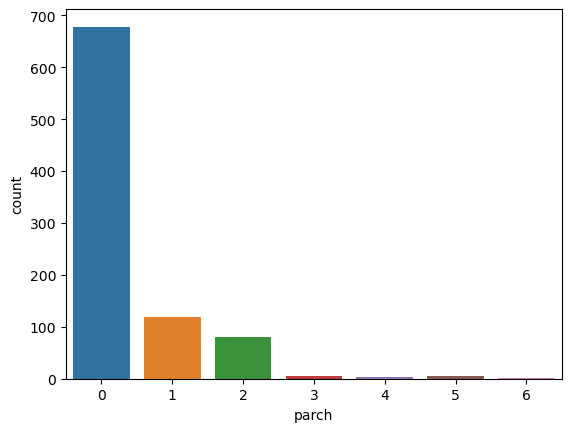

In [34]:
for col in cat_cols:
    if df[col].dtypes == "bool": # eğer değişken tipi "bool" ise değiştir.
        df[col] = df[col].astype(int) 
        cat_summary(df, col, plot=True)

    else:
        cat_summary(df, col, plot=True)

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
##########################################


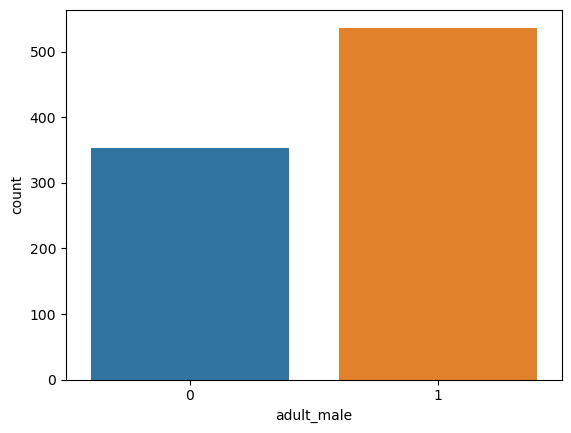

In [35]:
def cat_summary(dataframe, col_name, plot = False):

    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data = dataframe)
            plt.show(block=True)
    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x = dataframe[col_name], data = dataframe)
            plt.show(block = True)

cat_summary(df, "adult_male", plot = True)

### Analysis of Numerical Variables

In [36]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1


In [37]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [39]:
df[["age", "fare"]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [40]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
# bazı değişkenler sayısal gözükseler bile kategoriktir. örneğin "pclass"
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols

['age', 'fare']

In [41]:
def num_summary(dataframe, numerical_col):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

In [42]:
num_summary(df, "age")

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


In [43]:
for col in num_cols:
    num_summary(df, col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


In [44]:
def num_summary(dataframe, numerical_col, plot = False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.ylabel(numerical_col)
        plt.show(block = True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


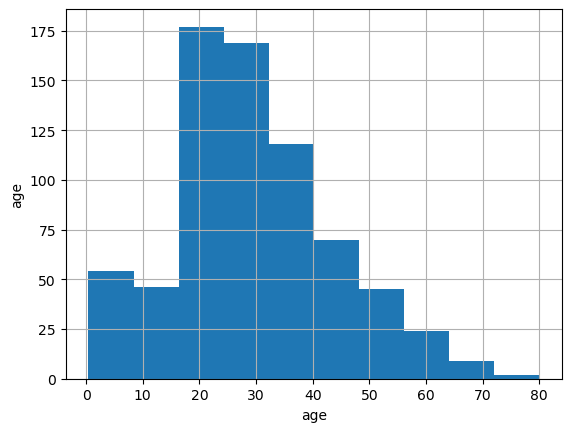

In [45]:
num_summary(df, "age", plot = True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


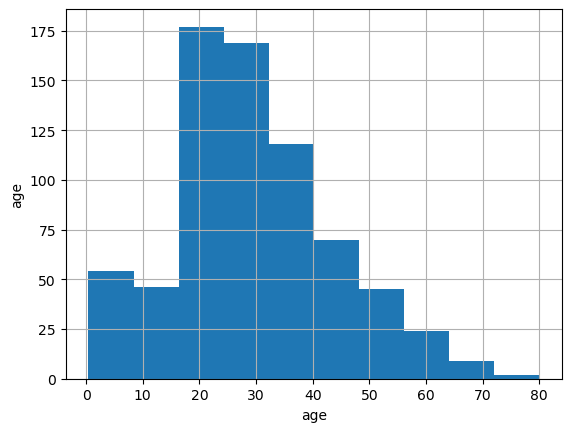

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


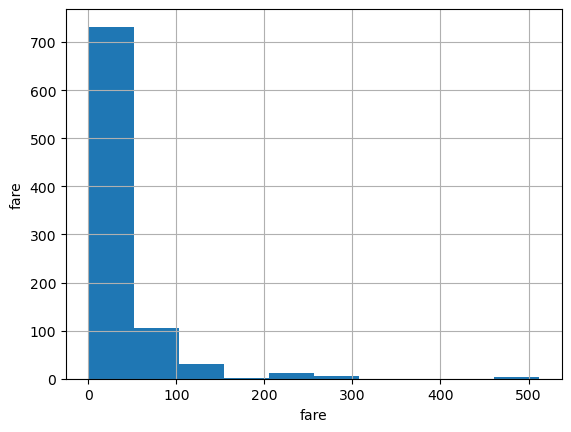

In [46]:
for col in num_cols:
    num_summary(df, col, plot = True)

### Değişkenlerin Yakalanması ve İşlemlerin Genelleştirilmesi

In [47]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    int64   
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    int64   
dtypes: category(2), float64(2), int64(6), object(5)
memory usage: 92.8+ KB


In [50]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    
    Parameters
    ----------
    dataframe: dataframe
        değişkenlerin isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri.
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri.
        
    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi.
    num_cols: list
        Numerik değişken listesi.
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi.
        
    Notes
    -----
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat, cat_cols'un içerisinde.
    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int", "float"]]
    
    cat_but_car = [col for col in dataframe.columns if
                  dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

In [51]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_but_cat: 6


In [52]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

cat_summary(df, "sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


In [53]:
for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################
     alive      Ratio
no     549  61.616162
yes    342  38.383838
#######################################

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


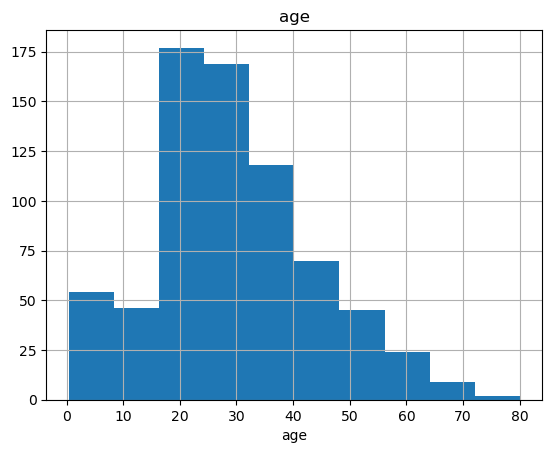

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


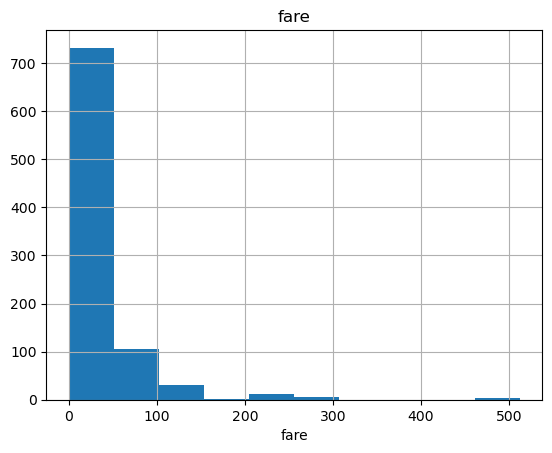

In [54]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)


for col in num_cols:
    num_summary(df, col, plot=True)

### Analysis of Target Variable
---
- **titanic** veri setinde bulunan hedef değişkenimizi analiz etmemiz gerekiyor. **survived**

In [55]:
for col in df.columns:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)

In [56]:
def cat_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)

In [57]:
def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in df.columns if
                   df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_but_cat: 6


In [58]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [59]:
cat_summary(df, "survived")

   survived      Ratio
0       549  61.616162
1       342  38.383838
##########################################


#### Hedef Değişkenin Kategorik Değişkenler ile Analizi

In [60]:
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [61]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end = "\n\n\n")

In [62]:
target_summary_with_cat(df, "survived", "pclass")

        TARGET_MEAN
pclass             
1          0.629630
2          0.472826
3          0.242363




In [63]:
for col in cat_cols:
    target_summary_with_cat(df, "survived", col)

        TARGET_MEAN
sex                
female     0.742038
male       0.188908


          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957


        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363


       TARGET_MEAN
who               
child     0.590361
man       0.163873
woman     0.756458


      TARGET_MEAN
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000


             TARGET_MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957


       TARGET_MEAN
alive             
no             0.0
yes            1.0


          TARGET_MEAN
survived             
0                 0.0
1                 1.0


        TARGET_MEAN
pclass             
1          0.629630
2          0.472826
3          0.242363


       TARGET_MEAN
sibsp             
0       

#### Hedef Değişkenin Sayısal Değişkenler ile Analizi

In [64]:
df.groupby("survived")["age"].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [65]:
df.groupby("survived").agg({"age":"mean"})

,age
survived,
0,30.626179
1,28.343690


In [66]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end = "\n\n\n")

In [67]:
target_summary_with_num(df, "survived", "age")

                age
survived           
0         30.626179
1         28.343690




In [68]:
for col in num_cols:
    target_summary_with_num(df, "survived", col)

                age
survived           
0         30.626179
1         28.343690


               fare
survived           
0         22.117887
1         48.395408


